# References and Acknowledgements
https://www.kaggle.com/kritidoneria/automl-titanic-using-pycaret

https://pycaret.org/ (Official Documentation)


Hi,
After seeing the response to [this notebook](https://www.kaggle.com/kritidoneria/titanic-using-pycaret-100-lines-of-code/comments) of mine wherein I made an entry for Titanic competition,I am doing a Regression analysis using PyCaret.
In this, I'll focus on very basic steps.

So you have a Kaggle account,what next? What if I tell you you can create your very first submission in less than 100 lines of code?

No,I'm not talking the usual Linear regression. I'm talking advanced Kaggle concepts like Feature engineering,Blending,Stackimg and Ensembling?

Welcome Pycaret,a low Code library developed by Moez Ali,which helps professional data scientists develop prototypes quickly with very few lines of code.

It provides a great starting point to rule out what works for your data and what doesn't,so I highly recommend this. In this code, We will read the data and create models and final predictions. I do recommend reading the official documentation while following along,and typing your own code by reading this notebook.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

train = pd.read_csv('./monsterData/monsters.csv')

This is a very detailed features list,however I'd like you to think of a few more factors that are not present in this data.
This helps with critical thinking in Data science

(2008 housing bubble burst for example)

In [2]:
train.head()

,name,size,type,alignment,ac,hp,cr,speed,swim,fly,...,persuasion,insight,deception,arcana,religion,acrobatics,athletics,intimidation,multiattack,legendary
0,aarakocra,2,0,neutral good,12,13,0.25,20,0,50,...,0,0,0,0,0,0,0,0,0,0
1,abjurer,2,0,any alignment,12,84,9.00,30,0,0,...,0,0,0,8,0,0,0,0,0,0
2,aboleth,4,1,lawful evil,17,135,10.00,10,40,0,...,0,0,0,0,0,0,0,0,1,1
3,abominable-yeti,5,2,chaotic evil,15,137,9.00,40,0,0,...,0,0,0,0,0,0,0,0,0,0
4,acererak,2,3,neutral evil,21,285,23.00,30,0,0,...,0,12,0,22,15,0,0,0,0,0


In [3]:
#Importing regression model from PyCaret. For classification,see the notebook mentioned above.
from pycaret.regression import *

**Pycaret Setup**

This is where magic happens.One line does all of these things:

* I will tell the model to ignore certain features with high cardinality,the target column,and give my session an id.
* I will also pass categorical features here.
* I will normalize the data
* I will pass multicollinearity handling and outlier handling as true so that it takes care of it implicitly
* I will also experiment with using PCA to reduce dimensionality here and set feature selection to true.

I highly encourage you to look up each of these terms.

# Setting up Pycaret

In [4]:
reg = setup(data = train, 
             target = 'hp',
             numeric_imputation = 'mean',
             numeric_features = ['ac', 'cr', 'speed', 'swim', 'fly', 'climb', 'burrow', 'passive_perception', 'darkvision', 'truesight', 'tremorsense', 'blindsight', 'str_mod', 'dex_mod', 'con_mod', 'int_mod', 'wis_mod', 'cha_mod', 'str_save', 'dex_save', 'con_save', 'int_save', 'wis_save', 'cha_save', 'history', 'perception', 'stealth', 'persuasion', 'insight', 'deception', 'arcana', 'religion', 'acrobatics', 'athletics', 'intimidation'],
             categorical_features = ['size', 'type', 'multiattack', 'legendary']  , 
             ignore_features = ['name', 'alignment'],
             feature_selection = True,
             pca=True,
             remove_multicollinearity=True,
             remove_outliers = True,
             normalize = True,
             silent = True)

,Description,Value
0,session_id,1448
1,Target,hp
2,Original Data,"(762, 42)"
3,Missing Values,False
4,Numeric Features,35
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(506, 43)"


# Viewing model results

In [5]:
#Now lets visualize the results for various models
compare_models(sort='RMSE') # because this is the evaluation metric of the competition

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,15.2221,745.9830,25.6624,0.8992,0.4028,0.3877,0.0060
br,Bayesian Ridge,17.3918,824.1999,27.4781,0.8818,0.5221,0.5022,0.0030
ridge,Ridge Regression,17.4766,821.4614,27.5081,0.8815,0.5439,0.5127,0.0040
lr,Linear Regression,17.5403,821.9237,27.5493,0.8811,0.5547,0.5177,0.1930
lar,Least Angle Regression,17.5403,821.9237,27.5493,0.8811,0.5547,0.5178,0.0040
par,Passive Aggressive Regressor,18.3861,985.5765,29.3693,0.8669,0.5504,0.6055,0.0030
lasso,Lasso Regression,18.4142,990.3537,29.5418,0.8662,0.4937,0.5978,0.0040
en,Elastic Net,22.1618,1406.3348,35.3480,0.8095,0.5456,0.7513,0.0030
lightgbm,Light Gradient Boosting Machine,22.2127,1475.8976,36.7689,0.7882,0.5127,0.6998,0.0310
et,Extra Trees Regressor,22.2647,1546.5082,37.1324,0.7922,0.5181,0.7390,0.0800


HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

# Selecting and tuning the best model

In [6]:
#selecting the best model
best = automl(optimize='rmse')

best

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

Time for some hyperparameter tuning. You're right, Pycaret does that for us as well!

In [7]:
cb = create_model('huber')
tuned_cb = tune_model(cb)
save_model(tuned_cb, 'monster_model')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16.2726,536.9902,23.1730,0.8732,0.5854,0.4779
1,18.1355,1195.5395,34.5766,0.8755,0.3739,0.3912
2,13.1864,326.8159,18.0780,0.9416,0.3368,0.4297
3,19.7367,799.4700,28.2749,0.8959,0.3252,0.3592
4,17.6740,2475.5608,49.7550,0.8213,0.3740,0.2738
5,10.9157,261.7725,16.1794,0.9381,0.4944,0.6493
6,12.2487,428.2303,20.6937,0.8698,0.3209,0.3267
7,13.7743,396.3795,19.9093,0.9412,0.4331,0.2969
8,15.1967,610.7792,24.7139,0.9116,0.3397,0.2581


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['size', 'type',
                                                             'multiattack',
                                                             'legendary'],
                                       display_types=False,
                                       features_todrop=['name', 'alignment'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['ac', 'cr', 'speed',
                                                           'swim', 'fly',
                                                           'climb', 'burrow',
                                                           'passive_perception',
                                                           'darkvision',
                                                           'truesight',
                                              

# Writing the submissions
Pycaret also allows for model blending like stacking,ensembling etc.For simplicity I shall omit it here. If you do fork this notebook, I highly encourage you to try it.Let's just write the best submission here.

In [8]:
sample=pd.json_normalize([
  {
    "name": "aarakocra",
    "size": 3,
    "type": 1,
    "alignment": "neutral good",
    "ac": 12,
    "cr": 10,
    "speed": 60,
    "swim": 0,
    "fly": 50,
    "climb": 0,
    "burrow": 0,
    "passive_perception": 15,
    "darkvision": 0,
    "truesight": 0,
    "tremorsense": 0,
    "blindsight": 0,
    "str_mod": 0,
    "dex_mod": 2,
    "con_mod": 0,
    "int_mod": 0,
    "wis_mod": 1,
    "cha_mod": 0,
    "str_save": 0,
    "dex_save": 0,
    "con_save": 0,
    "int_save": 0,
    "wis_save": 0,
    "cha_save": 0,
    "history": 0,
    "perception": 5,
    "stealth": 0,
    "persuasion": 0,
    "insight": 0,
    "deception": 0,
    "arcana": 0,
    "religion": 0,
    "acrobatics": 0,
    "athletics": 0,
    "intimidation": 0,
    "multiattack": 1,
    "legendary": 0
  },
]
)

In [9]:
#Let's create the final submission!!
predictions = predict_model(tuned_cb, data = sample)
sample['hp'] = predictions['Label']
sample.head()

,name,size,type,alignment,ac,cr,speed,swim,fly,climb,...,insight,deception,arcana,religion,acrobatics,athletics,intimidation,multiattack,legendary,hp
0,aarakocra,3,1,neutral good,12,10,60,0,50,0,...,0,0,0,0,0,0,0,1,0,120.555105


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


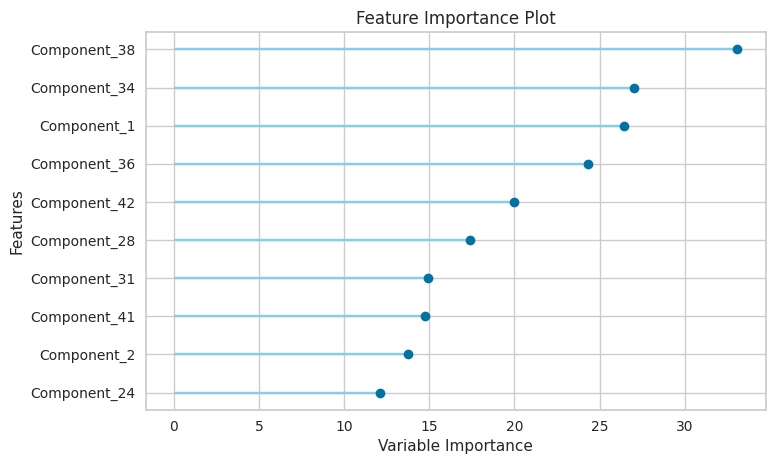

/home/cthuluke/dev/gold_tracker/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/cthuluke/dev/gold_tracker/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/cthuluke/dev/gold_tracker/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/cthuluke/dev/gold_tracker/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/cthuluke/dev/g

/home/cthuluke/dev/gold_tracker/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/cthuluke/dev/gold_tracker/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/cthuluke/dev/gold_tracker/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/cthuluke/dev/gold_tracker/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/cthuluke/dev/g

In [10]:
plot_model(tuned_cb,'feature')